In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from astropy.time import Time
import warnings

from matplotlib.ticker import MultipleLocator

In [3]:
import matplotlib as mpl
mpl.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Ariel']
mpl.rcParams['font.size'] = '25'
mpl.rcParams['xtick.labelsize'] = '25'
mpl.rcParams['ytick.labelsize'] = '25'

In [4]:
import sys
sys.path.append('../tools/')
from dust_extinction import calALambda
from data_binning import data_binning

In [5]:
print('NumPy version: {}'.format(np.__version__))
print('pandas version: {}'.format(pd.__version__))
print('matplotlib version: {}'.format(mpl.__version__))

NumPy version: 1.21.2
pandas version: 1.3.4
matplotlib version: 3.5.0


In [6]:
#%matplotlib notebook

In [7]:
# SN metadata

class SN_meta:
    def __init__(self, name, z, tmax, ebv, files):
        self.name = name
        self.z = z
        self.t_max_mjd = tmax - 2400000.5
        self.ebv = ebv
        files = np.sort(files)
        self.NIRfiles = files[[(np.loadtxt(spec)[-1, 0] > 1.1e4)
                               for spec in files]]
        self.NIRfiles = self.NIRfiles[[
            not ('GNIRS_v' in spec) for spec in self.NIRfiles
        ]]
        self.OPTfiles = files[[(np.loadtxt(spec)[-1, 0] < 1.1e4)
                               for spec in files]]
        print(self.NIRfiles)


jgb = SN_meta('SN\ 2020jgb',
              z=0.0307,
              tmax=2458986.91,
              ebv=0.404,
              files=glob.glob('./SN2020jgb/ZTF20aayhacx*ascii'))
byg = SN_meta('SN\ 2018byg',
              z=0.066,
              tmax=2458258.99,
              ebv=0.032,
              files=glob.glob('./SN2018byg/ZTF18aaqeasu*ascii'))
hnk = SN_meta('SN\ 2016hnk',
              z=0.0161,
              tmax=2457689.98,
              ebv=0.0224,
              files=glob.glob('./SN2016hnk/*dat'))
fe = SN_meta('SN\ 2011fe',
             z=0.000804,
             tmax=2455814.27,
             ebv=0.008,
             files=glob.glob('./SN2011fe/*dat'))

['./SN2020jgb/ZTF20aayhacx_20200609_GNIRS.ascii']
['./SN2018byg/ZTF18aaqeasu_20180603_Keck1_v1.ascii']
['./SN2016hnk/2016hnk_2016-11-04_01-57-23.700_Gemini-S_Flamingos-2_PESSTO.dat'
 './SN2016hnk/2016hnk_2016-11-06_02-05-03.429_ESO-NTT_Sofi_PESSTO.dat']
['./SN2011fe/SN2011fe_2011-08-28_04-05-00_HST_STIS_HST-Ia.dat'
 './SN2011fe/SN2011fe_2011-08-31_06-00-00_HST_STIS_HST-Ia.dat'
 './SN2011fe/SN2011fe_2011-09-03_09-07-00_HST_STIS_HST-Ia.dat'
 './SN2011fe/SN2011fe_2011-09-07_08-53-00_HST_STIS_HST-Ia.dat'
 './SN2011fe/SN2011fe_2011-09-10_09-22-00_HST_STIS_HST-Ia.dat'
 './SN2011fe/SN2011fe_2011-09-13_16-05-00_HST_STIS_HST-Ia.dat']


In [8]:
def plot_box_spec(wave, flux):
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave) / 2
    wv_plot = np.append(
        wave[0] - (wave[1] - wave[0]) / 2,
        np.append(np.repeat(wv_plot[0:-1], 2),
                  wave[-1] + (wave[-1] - wave[-2]) / 2))

    return wv_plot, flux_plot

5.0
15.0
19.0
25.0
Try the observation date.
Try the observation date.
Try the observation date.
Try the observation date.
Try the observation date.
Try the observation date.


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/3143012027.py:42: RuntimeWarning: invalid value encountered in log10
  np.log10(fl / norm_flux) - h * spec_num_norm[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/3143012027.py:42: RuntimeWarning: invalid value encountered in log10
  np.log10(fl / norm_flux) - h * spec_num_norm[num],


Try the observation date.
Try the observation date.
Try the observation date.


/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/3143012027.py:138: RuntimeWarning: invalid value encountered in log10
  np.log10(fl0 / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/3143012027.py:109: UserWarning: No flux uncertainty in the datafile!
  warnings.warn("No flux uncertainty in the datafile!")
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/3143012027.py:138: RuntimeWarning: invalid value encountered in log10
  np.log10(fl0 / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/3143012027.py:138: RuntimeWarning: invalid value encountered in log10
  np.log10(fl0 / norm_flux) - h * spec_num[num],


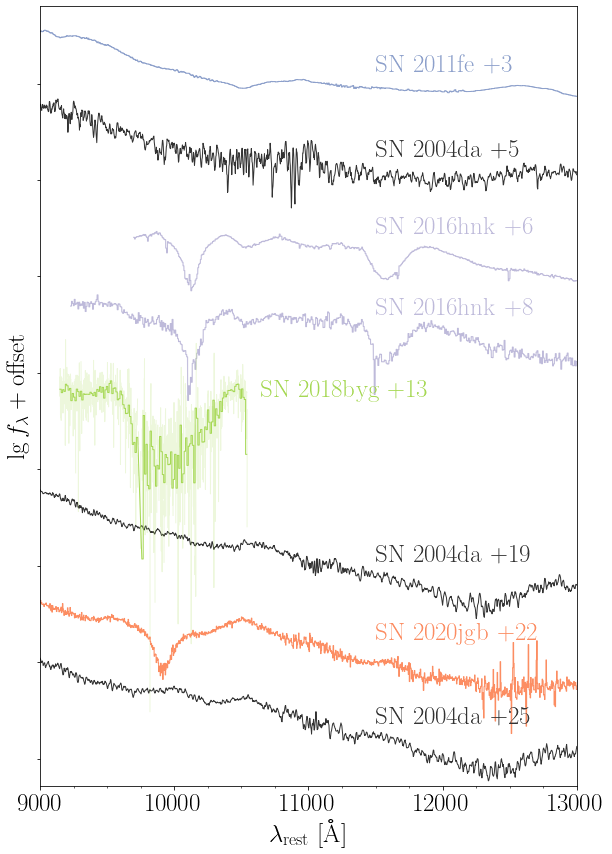

In [9]:
rv = 3.1

color_map = {
    'cyan': '#66c2a5',
    'orange': '#fc8d62',
    'blue': '#8da0cb',
    'purple': '#bebada',
    'pink': '#fccde5',
    'green': '#a6d854',
    'yellow': '#ffd92f',
    'brown': '#e5c494',
    'grey': '0.3'
}

fig, ax = plt.subplots(figsize=(8, 12))

h = 0.8
v = 11500

normIa = glob.glob('./NIR_Marion09/*04da*')
normIa.sort()

spec_num_norm = [1, 5, 6, 8]
num = -1
for spec in normIa:
    with open(spec) as f:
        ll = f.readlines()
    for l in ll:
        if 'Phase' in l:
            phase = float(l.split('=')[1].split("d")[0])
            print(phase)
    num += 1
    if num == 1:
        continue
    spec_df = pd.read_csv(spec,
                          comment='#',
                          delim_whitespace=True,
                          header=None)
    wv, fl = spec_df[1].values * 1e4, spec_df[2].values
    norm_flux = np.nanmedian(fl[np.where((wv > 10300) & (wv < 10500))])
    ax.plot(wv,
            np.log10(fl / norm_flux) - h * spec_num_norm[num],
            color='0.2',
            linewidth=1)
    if phase < 0:
        ax.text(min(v, wv[-1] * 1.01),
                .1 * h - h * 1.05 * spec_num_norm[num],
                r'$\mathrm{SN\ 2004da}$' + ' $-{:.0f}$'.format(np.abs(phase)),
                color='0.2')
    else:
        ax.text(min(v, wv[-1] * 1.01),
                .1 * h - h * 1.05 * spec_num_norm[num],
                r'$\mathrm{SN\ 2004da}$' + ' $+{:.0f}$'.format(np.abs(phase)),
                color='0.2')

spec_num = [0, 2, 3, 4, 7]
num = -1
for sn, c in zip([fe, hnk, byg, jgb], ['blue', 'purple', 'green', 'orange']):
    for spec in sn.NIRfiles:
        spec_df = pd.read_csv(spec,
                              comment='#',
                              delim_whitespace=True,
                              header=None)

        with open(spec) as f:
            ll = f.readlines()
        # brute force
        mjd_found = False
        for l in ll:
            if 'MJD' in l:
                mjd_found = True
                if '=' in l and 'at start' in l:
                    mjd_obs = float(l.split('=')[1].split("'")[1])
                elif '=' in l and '/' in l:
                    mjd_obs = float(l.split('=')[1].split('/')[0])
                elif '=' in l:
                    mjd_obs = float(l.split('=')[1])
                elif ':' in l:
                    mjd_obs = float(l.split(':')[1])
                break
        if not mjd_found:
            print('Warning: MJD-obs not found in {}!'.format(spec))
            print('Try the observation date.')
            year = '_20'
            pos_dat = spec.find(str(year)) + 1
            try:
                year_obs = spec[pos_dat:pos_dat + 4]
                mon_obs = spec[pos_dat + 4:pos_dat + 6]
                date_obs = spec[pos_dat + 6:pos_dat + 8]
                mjd_obs = Time('{}-{}-{}'.format(year_obs, mon_obs,
                                                 date_obs)).mjd
            except:
                mjd_obs = Time(spec[pos_dat:pos_dat + 10]).mjd

        phase = (mjd_obs - sn.t_max_mjd) / (1 + sn.z)
        if phase < 1:
            continue
        num += 1

        try:
            if 'Keck' in spec:
                fl_unc = spec_df[3].values
            else:
                fl_unc = spec_df[2].values

                if 'P60' in spec or 'P200' in spec:
                    fl_unc **= .5
        except:
            warnings.warn("No flux uncertainty in the datafile!")
            # set relative uncertainty to be 10%
            fl_unc = np.ones_like(spec_df[0].values) * 1e-1 * np.median(
                spec_df[0].values)
        fl_unc0 = fl_unc.copy()

        wv0, fl0 = spec_df[0].values, spec_df[1].values,
        E0 = 10**(0.4 * calALambda(wv0, rv, sn.ebv))
        fl0 = fl0 * E0

        if sn == byg:
            out = data_binning(np.array(
                [spec_df[0].values, spec_df[1].values, fl_unc]).T,
                               size=10)
        else:
            out = data_binning(np.array(
                [spec_df[0].values, spec_df[1].values, fl_unc]).T,
                               size=1)
        wv, fl = plot_box_spec(out[:, 0], out[:, 1])
        wv, fl = wv[fl > 1e-2 * np.nanmedian(fl)], fl[fl > 1e-2 * np.nanmedian(fl)]

        fl_unc = np.repeat(out[:, -1], 2)

        E = 10**(0.4 * calALambda(wv, rv, sn.ebv))
        fl = fl * E

        norm_flux = np.nanmedian(fl[np.where((wv / (1 + sn.z) > 10300)
                                             & (wv / (1 + sn.z) < 10500))])
        ax.plot(wv0 / (1 + sn.z),
                np.log10(fl0 / norm_flux) - h * spec_num[num],
                color=color_map[c],
                linewidth=1,
                alpha=0.2)
        ax.plot(wv / (1 + sn.z),
                np.log10(fl / norm_flux) - h * spec_num[num],
                color=color_map[c],
                linewidth=1)
        if mjd_obs < sn.t_max_mjd:
            ax.text(min(v, wv[-1] / (1 + sn.z) * 1.01),
                    .15 * h - 1.05 * h * spec_num[num],
                    r'$\mathrm{' + sn.name + '}$' +
                    ' $-{:.0f}$'.format(np.abs(phase)),
                    color=color_map[c])
        else:
            ax.text(min(v, wv[-1] / (1 + sn.z) * 1.01),
                    .15 * h - 1.05 * h * spec_num[num],
                    r'$\mathrm{' + sn.name + '}$' +
                    ' $+{:.0f}$'.format(np.abs(phase)),
                    color=color_map[c])

ax.set_xlim(9000, 13000)
ax.set_ylim(-h * (spec_num_norm[-1] + 1.1), h)
ax.set_yticklabels([])
ax.set_ylabel(r'$\lg f_\lambda + \mathrm{offset}$')
ax.set_xlabel(r'$\lambda_\mathrm{rest}\ [\mathrm{\r{A}}]$',
              **{'fontname': 'Times New Roman'})
ax.xaxis.set_minor_locator(MultipleLocator(250))
ax.yaxis.set_major_locator(MultipleLocator(1))

fig.subplots_adjust(left=0.06, bottom=0.051, top=0.953, right=0.991)
#fig.savefig('../paper/figures/optical_spec_evolution.pdf', bbox_inches='tight')

In [11]:
from scipy.interpolate import splrep, splev

/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/733024724.py:146: RuntimeWarning: invalid value encountered in log10
  np.log10(fl0 / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/733024724.py:151: RuntimeWarning: invalid value encountered in log10
  np.log10(fl / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/733024724.py:146: RuntimeWarning: invalid value encountered in log10
  np.log10(fl0 / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/733024724.py:151: RuntimeWarning: invalid value encountered in log10
  np.log10(fl / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/733024724.py:146: RuntimeWarning: invalid value encountered in log10
  np.log10(fl0 / norm_flux) - h * spec_num[num],
/var/folders/_g/qsrvvtv17zn3wk8jrrrfhmx80000gn/T/ipykernel_1750/733024724.py:151: RuntimeWar

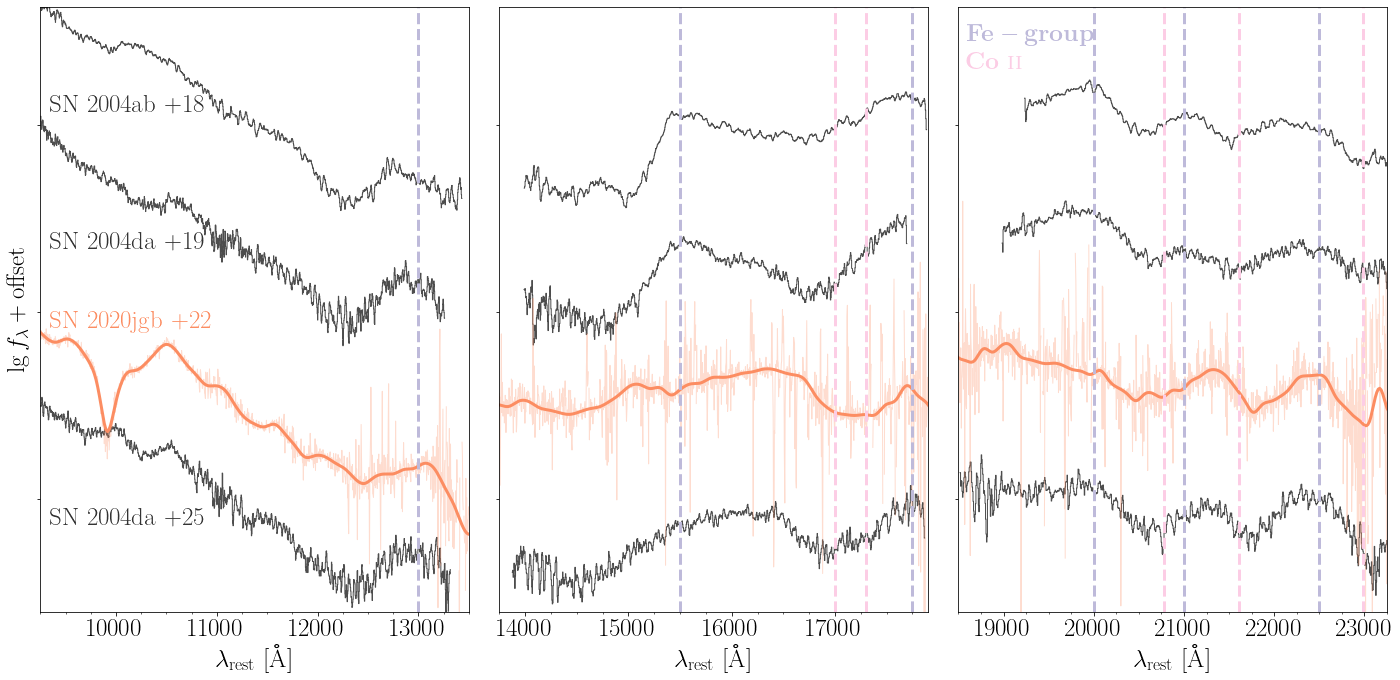

In [146]:
rv = 3.1

color_map = {
    'cyan': '#66c2a5',
    'orange': '#fc8d62',
    'blue': '#8da0cb',
    'purple': '#bebada',
    'pink': '#fccde5',
    'green': '#a6d854',
    'yellow': '#ffd92f',
    'brown': '#e5c494',
    'grey': '0.3'
}

fig, Ax = plt.subplots(1, 3, figsize=(20, 10), sharey=True)

h = 0.7
V = [9350, 16000, 20000]
ran = [[9250, 13500], [13750, 17900], [18500, 23250]]

normIas = [
    glob.glob('./NIR_Marion09/*04da*'),
    glob.glob('./NIR_Marion09/*04ab*')
]
for k in range(3):
    ax = Ax[k]
    v = V[k]

    spec_num = [[1, 3], [0]]
    names = [r'$\mathrm{SN\ 2004da}$', r'$\mathrm{SN\ 2004ab}$']
    for normIa, spec_num_norm, name in zip(normIas, spec_num, names):
        normIa.sort()
        num = -1
        for spec in normIa:
            with open(spec) as f:
                ll = f.readlines()
            for l in ll:
                if 'Phase' in l:
                    phase = float(l.split('=')[1].split("d")[0])
            if phase < 17:
                continue
            num += 1
            spec_df = pd.read_csv(spec,
                                  comment='#',
                                  delim_whitespace=True,
                                  header=None)
            wv0, fl0 = spec_df[1].values * 1e4, spec_df[2].values
            fl0, wv0 = fl0[wv0 > ran[k][0]][2:], wv0[wv0 > ran[k][0]][2:]
            fl0, wv0 = fl0[wv0 < ran[k][-1]], wv0[wv0 < ran[k][-1]]
            wv, fl = plot_box_spec(wv0, fl0)

            norm_flux = np.nanmedian(fl[np.abs(wv - np.mean(ran[k])) < 500])
            ax.plot(wv,
                    np.log10(fl / norm_flux) - h * spec_num_norm[num],
                    color='0.3',
                    alpha=1,
                    linewidth=1)
            if phase < 0:
                Phase = ' $-{:.0f}$'.format(np.abs(phase))
            else:
                Phase = ' $+{:.0f}$'.format(np.abs(phase))
            if k == 0:
                ax.text(min(v, wv[-1] * 1.01),
                        .1 * h - h * 1.05 * spec_num_norm[num],
                        name + Phase,
                        color='0.2')

    spec_num = [2]
    num = -1
    for sn, c in zip([jgb], ['orange']):
        for spec in sn.NIRfiles:
            spec_df = pd.read_csv(spec,
                                  comment='#',
                                  delim_whitespace=True,
                                  header=None)

            with open(spec) as f:
                ll = f.readlines()
            # brute force
            mjd_found = False
            for l in ll:
                if 'MJD' in l:
                    mjd_found = True
                    if '=' in l and 'at start' in l:
                        mjd_obs = float(l.split('=')[1].split("'")[1])
                    elif '=' in l and '/' in l:
                        mjd_obs = float(l.split('=')[1].split('/')[0])
                    elif '=' in l:
                        mjd_obs = float(l.split('=')[1])
                    elif ':' in l:
                        mjd_obs = float(l.split(':')[1])
                    break
            if not mjd_found:
                print('Warning: MJD-obs not found in {}!'.format(spec))
                print('Try the observation date.')
                year = '_20'
                pos_dat = spec.find(str(year)) + 1
                try:
                    year_obs = spec[pos_dat:pos_dat + 4]
                    mon_obs = spec[pos_dat + 4:pos_dat + 6]
                    date_obs = spec[pos_dat + 6:pos_dat + 8]
                    mjd_obs = Time('{}-{}-{}'.format(year_obs, mon_obs,
                                                     date_obs)).mjd
                except:
                    mjd_obs = Time(spec[pos_dat:pos_dat + 10]).mjd

            phase = (mjd_obs - sn.t_max_mjd) / (1 + sn.z)
            if phase < 1:
                continue
            num += 1

            try:
                if 'Keck' in spec:
                    fl_unc = spec_df[3].values
                else:
                    fl_unc = spec_df[2].values

                    if 'P60' in spec or 'P200' in spec:
                        fl_unc **= .5
            except:
                warnings.warn("No flux uncertainty in the datafile!")
                # set relative uncertainty to be 10%
                fl_unc = np.ones_like(spec_df[0].values) * 1e-1 * np.median(
                    spec_df[0].values)
            fl_unc0 = fl_unc.copy()

            wv0, fl0 = spec_df[0].values, spec_df[1].values,
            E0 = 10**(0.4 * calALambda(wv0, rv, sn.ebv))
            fl0 = fl0 * E0

            out = data_binning(np.array(
                [spec_df[0].values, spec_df[1].values, fl_unc]).T,
                               size=100)
            wv, fl = plot_box_spec(out[:, 0], out[:, 1])
            spl = splrep(out[:, 0], out[:, 1])
            wv = np.linspace(out[0, 0], out[-1, 0], 1000)
            fl = splev(wv, spl)

            #fl_unc = np.repeat(out[:, -1], 2)

            E = 10**(0.4 * calALambda(wv, rv, sn.ebv))
            fl = fl * E

            norm_flux = np.nanmedian(fl[np.abs(wv - np.mean(ran[k])) < 500])
            ax.plot(wv0 / (1 + sn.z),
                    np.log10(fl0 / norm_flux) - h * spec_num[num],
                    color=color_map[c],
                    linewidth=1,
                    alpha=0.3)
            ax.plot(wv / (1 + sn.z),
                    np.log10(fl / norm_flux) - h * spec_num[num],
                    color=color_map[c],
                    linewidth=3)
            if phase < 0:
                Phase = ' $-{:.0f}$'.format(np.abs(phase))
            else:
                Phase = ' $+{:.0f}$'.format(np.abs(phase))
            if k == 0:
                ax.text(min(v, wv[-1] / (1 + sn.z) * 1.01),
                        .45 * h - 1.0 * h * spec_num[num],
                        r'$\mathrm{' + sn.name + '}$' + Phase,
                        color=color_map[c])

    ax.set_xlim(ran[k])
    ax.set_ylim(-h * 4 + 0.2, h * .9)
    ax.set_yticklabels([])
    ax.set_xlabel(r'$\lambda_\mathrm{rest}\ [\mathrm{\r{A}}]$',
                  **{'fontname': 'Times New Roman'})
    ax.xaxis.set_minor_locator(MultipleLocator(250))
    ax.yaxis.set_major_locator(MultipleLocator(1))

Ax[0].set_ylabel(r'$\lg f_\lambda + \mathrm{offset}$')

Ax[0].axvline(13000, linestyle='--', linewidth=3, color=color_map['purple'])
Ax[1].axvline(15500, linestyle='--', linewidth=3, color=color_map['purple'])
Ax[1].axvline(17750, linestyle='--', linewidth=3, color=color_map['purple'])
Ax[2].axvline(20000, linestyle='--', linewidth=3, color=color_map['purple'])
Ax[2].axvline(21000, linestyle='--', linewidth=3, color=color_map['purple'])
Ax[2].axvline(22500, linestyle='--', linewidth=3, color=color_map['purple'])
Ax[1].axvline(17462 * (1 - 8 / 300),
              linestyle='--',
              linewidth=3,
              color=color_map['pink'])
Ax[1].axvline(17772 * (1 - 8 / 300),
              linestyle='--',
              linewidth=3,
              color=color_map['pink'])
Ax[2].axvline(21350 * (1 - 8 / 300),
              linestyle='--',
              linewidth=3,
              color=color_map['pink'])
Ax[2].axvline(22205 * (1 - 8 / 300),
              linestyle='--',
              linewidth=3,
              color=color_map['pink'])
Ax[2].axvline(23613 * (1 - 8 / 300),
              linestyle='--',
              linewidth=3,
              color=color_map['pink'])

Ax[2].text(ran[2][0] + 80,
           0.45,
           r'$\mathbf{Fe-group}$',
           color=color_map['purple'])
Ax[2].text(ran[2][0] + 80,
           0.3,
           r'$\mathbf{Co\ \textsc{ii}}$',
           color=color_map['pink'])
#plt.show()
fig.subplots_adjust(left=0, bottom=0, top=1, right=1)
fig.tight_layout()
#fig.savefig('../paper/figures/optical_spec_evolution.pdf', bbox_inches='tight')